In [1]:
import os
from sound.sound_eval import eval_sound
import numpy as np
from matplotlib import pyplot as plt
import pydub
from time_series.anomaly_detection import polyreg_outliar_mse, lof
folders = ["data/cust", "data/topsdata"]
data_rms = []
data_bin = []
def eval_linreg(arr, n, linreg):
    arr = np.array(arr).reshape((len(arr),))
    windows = []
    labels = []
    for i in range(len(arr)-n):
        windows.append(arr[i:i+n])
        labels.append(arr[i+n])
    return (linreg.predict(windows) - labels)**2
for dir in folders:
    for filename in os.listdir(dir):
        fil = os.path.join(dir, filename)
        print("getting", fil)
        a = pydub.AudioSegment.from_mp3(fil)
        
        y = np.array(a.get_array_of_samples())
        print(y.shape)
        data_binr, data_rmsr, _ = eval_sound(y,a)
        data_bin.append(data_binr)
        data_rms.append(data_rmsr)
        del a
        del y
a = pydub.AudioSegment.from_mp3("data/custom_game.mp3")
        
y = np.array(a.get_array_of_samples())
data_binr, data_rmsr, _ = eval_sound(y,a)
linreg_rms = polyreg_outliar_mse(data_rms, 15)
linreg_bin = polyreg_outliar_mse(data_bin, 15)

getting data/cust\c1.mp3
(36240032,)
getting data/cust\c2.mp3
(65520000,)
getting data/cust\c3.mp3
(79440016,)
getting data/cust\c4.mp3
(69789168,)
getting data/cust\c5.mp3
(61149184,)
getting data/cust\c6.mp3
(6429168,)
getting data/topsdata\topson1.mp3
(35897400,)
getting data/topsdata\topson2.mp3
(38367000,)
getting data/topsdata\topson3.mp3
(44982000,)
getting data/topsdata\topson4.mp3
(57771000,)
getting data/topsdata\topson5.mp3
(50807100,)
getting data/topsdata\topson6.mp3
(5516400,)


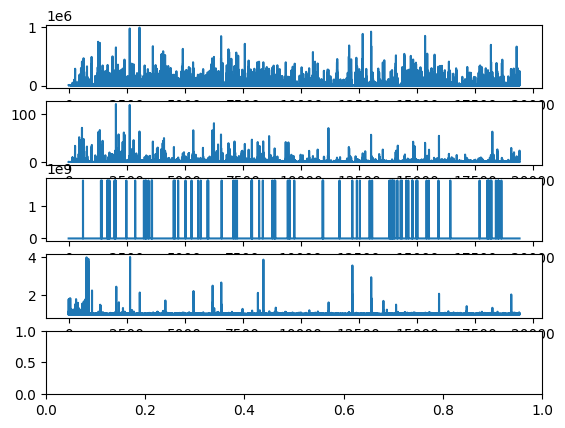

In [2]:
fig, axs = plt.subplots(5)
    
axs[0].plot(eval_linreg(data_binr, 15, linreg_bin))
axs[1].plot(eval_linreg(data_rmsr, 15, linreg_rms))
axs[2].plot(lof(np.array(data_binr), 100))
axs[3].plot(lof(np.array(data_rmsr), 100))

plt.show()


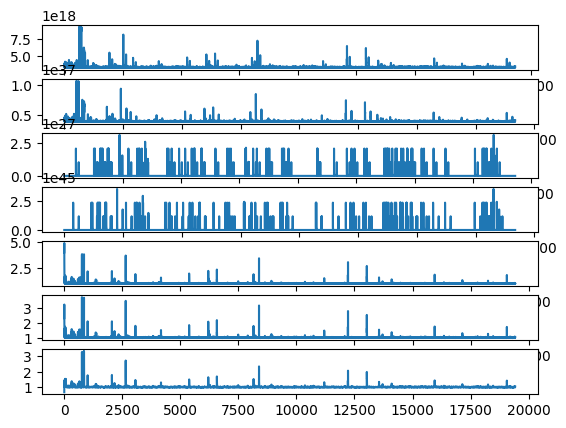

<Figure size 1800x1200 with 0 Axes>

In [9]:
from time_series.smoothening_functions import power_smooth, llr_smooth, ewma_bias_corrected
fig, axs = plt.subplots(7)
plt.figure(figsize=(18,12))    
axs[0].plot(power_smooth(lof(np.array(data_rmsr), 100), 120))
axs[1].plot(power_smooth(lof(np.array(data_rmsr), 100), 240))
axs[2].plot(power_smooth(lof(np.array(data_binr), 100), 120))
axs[3].plot(power_smooth(lof(np.array(data_binr), 100), 240))
axs[4].plot(ewma_bias_corrected(lof(np.array(data_rmsr), 100), 0.8))
axs[5].plot(ewma_bias_corrected(lof(np.array(data_rmsr), 100), 0.7))
axs[6].plot(ewma_bias_corrected(lof(np.array(data_rmsr), 100), 0.4))
plt.show()

In [12]:
from time_series.anomaly_detection import isolfor_outliar
db = np.array(data_bin[0])
for i in range(6):
    if i == 0:
        continue
    db = np.concatenate((db,np.array(data_bin[i])))
forr = isolfor_outliar(db)

d:\Games\Dota_2_Highlight\time_series\anomaly_detection.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(arr).reshape(-1, 1)


ValueError: setting an array element with a sequence.